In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%cd ../

/work/ban-m/pathhap


In [2]:
df = pd.read_csv('result/pathhap_test_faster.tsv', delimiter = '\t')

In [3]:
df

,Seed,LK,Coverage,Error,Accuracy,ElapsedTime,SubsampleSize
0,12725350583703703346,-17745.555,10,0.0,1.000000,1467,1024
1,5601019353616417611,-17505.629,10,0.0,1.000000,2740,1024
2,12951140279705930568,-17451.958,10,0.0,1.000000,760,1024
3,6015749742597254285,-17869.907,10,0.0,1.000000,1592,1024
4,582612466983336848,-17728.748,10,0.0,1.000000,766,1024
...,...,...,...,...,...,...,...
2995,7303011321867149102,-95034.316,50,0.2,0.596250,14074,524288
2996,15783363627377644825,-94244.099,50,0.2,0.964375,10911,524288
2997,6302211186957335811,-94745.937,50,0.2,0.956875,14674,524288
2998,7546728369769894228,-94442.063,50,0.2,0.989688,11850,524288


In [4]:
df.head()

,Seed,LK,Coverage,Error,Accuracy,ElapsedTime,SubsampleSize
0,12725350583703703346,-17745.555,10,0.0,1.0,1467,1024
1,5601019353616417611,-17505.629,10,0.0,1.0,2740,1024
2,12951140279705930568,-17451.958,10,0.0,1.0,760,1024
3,6015749742597254285,-17869.907,10,0.0,1.0,1592,1024
4,582612466983336848,-17728.748,10,0.0,1.0,766,1024


In [5]:
df.head(1000)

,Seed,LK,Coverage,Error,Accuracy,ElapsedTime,SubsampleSize
0,12725350583703703346,-17745.555,10,0.0,1.000000,1467,1024
1,5601019353616417611,-17505.629,10,0.0,1.000000,2740,1024
2,12951140279705930568,-17451.958,10,0.0,1.000000,760,1024
3,6015749742597254285,-17869.907,10,0.0,1.000000,1592,1024
4,582612466983336848,-17728.748,10,0.0,1.000000,766,1024
...,...,...,...,...,...,...,...
995,10436394277908518356,-36872.885,20,0.1,0.987500,9139,524288
996,13123918619088453067,-36565.861,20,0.1,0.996875,9293,524288
997,9424329186782810339,-36888.597,20,0.1,0.998437,39974,524288
998,7094746129727930684,-36634.421,20,0.1,0.996094,11211,524288


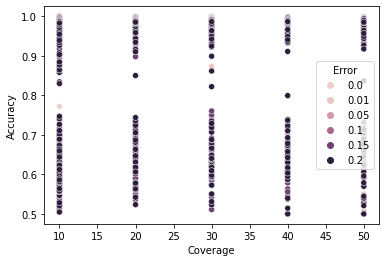

In [6]:
sns.scatterplot(data=df, x = 'Coverage',  y = 'Accuracy', hue= 'Error').get_figure().savefig("./png/cov_acc.dump.png", dpi=300)

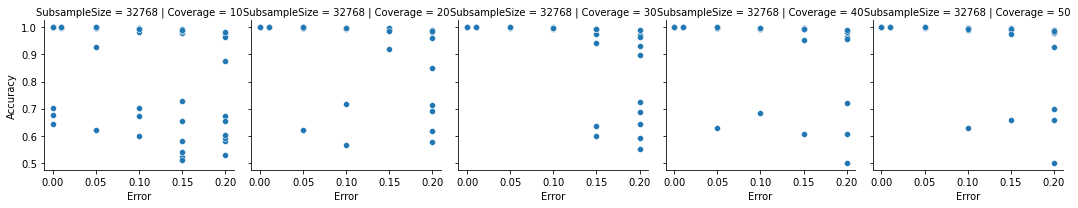

In [7]:
covselected = df[df['SubsampleSize'] == 1 << 15]
g = sns.FacetGrid(covselected, col = 'Coverage', row = "SubsampleSize")
g.map(sns.scatterplot, "Error", "Accuracy")
g.savefig("./png/error_acc.pow15.png", dpi=300)

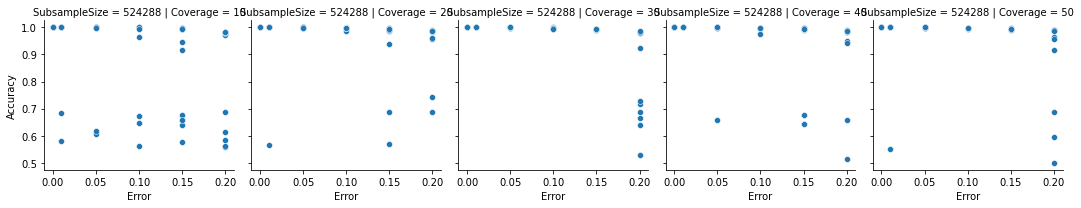

In [8]:
covselected = df[df['SubsampleSize'] == 1 << 19]
g = sns.FacetGrid(covselected, col = 'Coverage', row = "SubsampleSize")
g.map(sns.scatterplot, "Error", "Accuracy")
g.savefig("./png/error_acc.pow19.png", dpi=300)

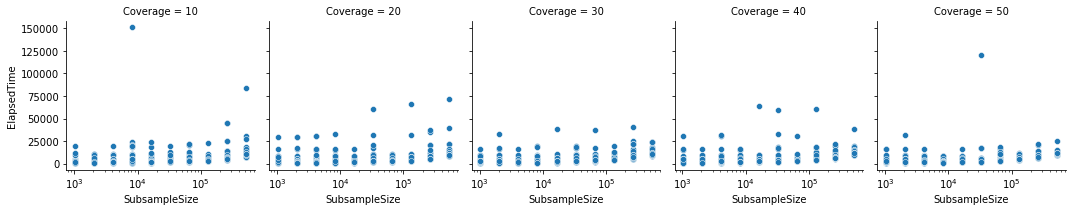

In [9]:
g = sns.FacetGrid(df, col = 'Coverage')
g.map(sns.scatterplot, 'SubsampleSize', 'ElapsedTime').set(xscale='log')
g.savefig("./png/elapsed_1.png", dpi=300)

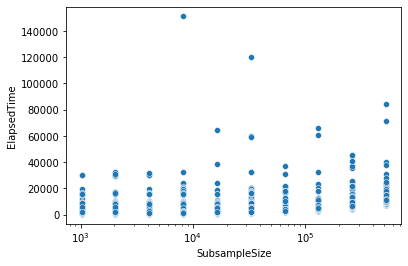

In [10]:
fig = sns.scatterplot(data = df, x = 'SubsampleSize', y = 'ElapsedTime')
fig.set(xscale='log')
fig.get_figure().savefig("./png/elapsed_2.png", dpi=300)

Text(0, 0.5, 'Elapsed Time(ms)')

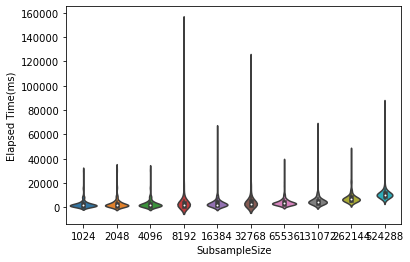

In [11]:
sns.violinplot(data=df, x = 'SubsampleSize', y = 'ElapsedTime').set_ylabel("Elapsed Time(ms)")

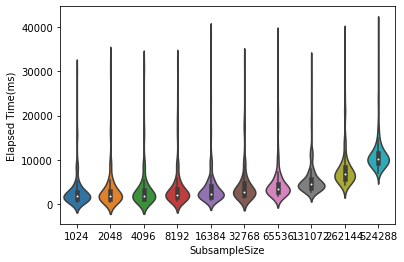

In [13]:
filtereddata = df[df['ElapsedTime'] < 40000]
fig = sns.violinplot(data=filtereddata, x = 'SubsampleSize', y = 'ElapsedTime')
fig.set_ylabel("Elapsed Time(ms)")
fig.get_figure().savefig("./png/elapsed_3.png", dpi=300)